In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab    
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
new_review = pd.read_csv('new_review.csv')
new_business = pd.read_csv('new_business.csv')

In [23]:
business_review= new_business[new_business.city=='Las Vegas']['review_count']
param_La = stats.norm.fit(df_La)
print ("Las Vegas","\n"
       "mean:",param_La[0],"\n"
       "standard deviation:",param_La[1],"\n"
        "skewness:", stats.skew(business_review.values, axis=0,  bias=True),"\n"
       "kurtosis:", stats.kurtosis(business_review.values, axis=0, fisher=False, bias=True))

Las Vegas 
mean: 59.1746688742 
standard deviation: 195.942158523 
skewness: 11.588858601446189 
kurtosis: 211.04538215307633


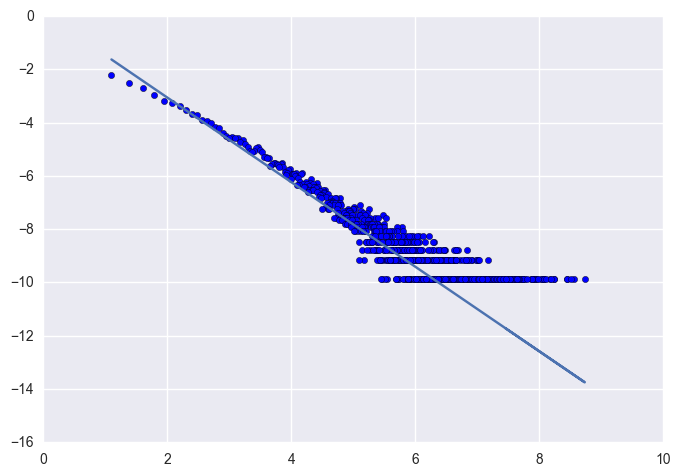

In [26]:
par=business_review.value_counts()
freq=par/sum(par)
plt.scatter(np.log(par.index),np.log(freq))
alpha = len(business_review)/sum(np.log(business_review/min(par.index)))
fitted = (alpha/min(par.index))*((par.index/min(par.index))**(-(alpha+1)))
plt.plot(np.log(par.index),np.log(fitted))

In [27]:
features=['business_id','review_id','stars_x','user_id','city']
new=pd.merge(new_review,new_business,on='business_id') 
new_La=new[features]
new_La=new_La[new_La.city=="Las Vegas"]

user_review=new_La.user_id.value_counts()

In [28]:
param_La = stats.norm.fit(user_review)
print ("Las Vegas","\n"
       "mean:",param_La[0],"\n"
       "standard deviation:",param_La[1],"\n"
        "skewness:", stats.skew(user_review.values, axis=0,  bias=True),"\n"
       "kurtosis:", stats.kurtosis(user_review.values, axis=0, fisher=False, bias=True))

Las Vegas 
mean: 3.26109487321 
standard deviation: 10.6580397938 
skewness: 39.45934778058514 
kurtosis: 3344.8511848904254


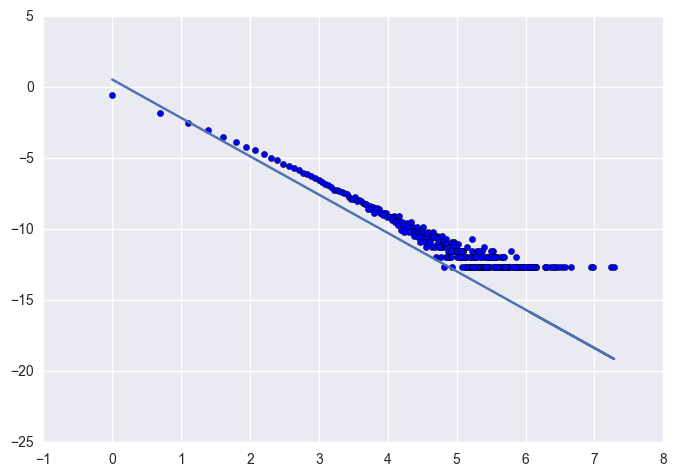

In [20]:
par=user_review.value_counts()
freq=par/sum(par)
plt.scatter(np.log(par.index),np.log(freq))
alpha = len(user_review)/sum(np.log(user_review/min(par.index)))
fitted = (alpha/min(par.index))*((par.index/min(par.index))**(-(alpha+1)))
plt.plot(np.log(par.index),np.log(fitted))